<a href="https://colab.research.google.com/github/Guylord/Breast-Cancer-Classification-Scikit-learn-and-TensorFlow/blob/main/Breast_Cancer_Classification_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing relavant libraries

The code imports essential libraries for data manipulation, visualization, and machine learning. ***pandas*** and ***numpy*** handle data processing, while ***matplotlib*** and ***seaborn*** provide visualization tools. For model building, ***scikit-learn*** is used for algorithms, preprocessing, and evaluation. Additionally, tensorflow is imported for building and training neural network models.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing modules
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Machine learning algorithmns modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation modules
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

# Neural network modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Ucimlrepo package
The ucimlrepo package is used to load the Breast Cancer Wisconsin (Diagnostic) dataset from the UCI repository. The metadata display gives a comprehensive breakdown of the dataset's features, offering an essential understanding to guide the subsequent analysis steps.

In [2]:
#Breast Cancer Wisconsin (Diagnostic) dataset- Metadata
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
print(breast_cancer_wisconsin_diagnostic.metadata)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [3]:
# Dataset loading
df = pd.read_csv('https://archive.ics.uci.edu/static/public/17/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

# Exploratory Data Analysis

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [4]:
#Distribution of the target variable
df['Diagnosis'].value_counts()

,count
Diagnosis,
B,357
M,212


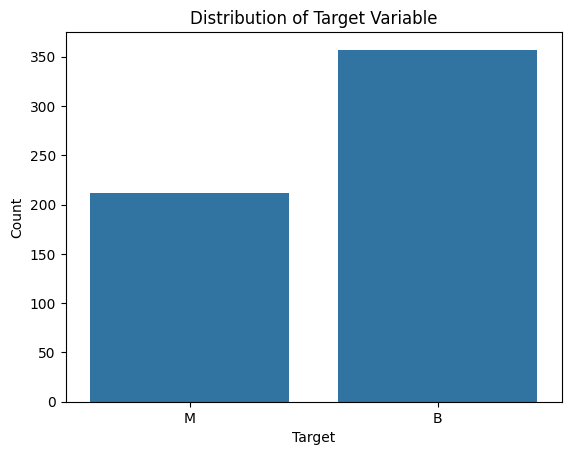

In [5]:
#Distribution of the target variable (Visualization)
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Data preprocessing

In [7]:
#Variables
X = df.drop(['ID','Diagnosis'], axis=1)
y = df['Diagnosis']

print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (569, 30)
y shape: (569,)


In [8]:
#Target variable label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

random_state=925

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model building (Scikit-learn)
The process entails training and assessing various machine learning models on the dataset. Several algorithms, including logistic regression, decision trees, and random forests, are evaluated to compare their accuracy, classification performance, and confusion matrices, helping determine the best model for the task.

In [9]:
# Model evaluation function
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    return accuracy, report, matrix

In [10]:
# Model building
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()}

results = {}
for model_name, model in models.items():
    accuracy, report, matrix = evaluate_model(model)
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": matrix
    }

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("\n" + "="*60 + "\n")

Model: Logistic Regression
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

Confusion Matrix:
[[72  0]
 [ 0 42]]


Model: K-Nearest Neighbors
Accuracy: 0.9825
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
[[71  1]
 [ 1 41]]


Model: Support Vector Machine
Accuracy: 0.9912
Classification Report:
              precision    recall  f1-score   support

         

# Fine-tuning
Logistic Regression and Random Forest models performed excellently with perfect accuracy. The Decision Tree, while good, has room for improvement. Therefore, the K-Nearest Neighbors, Support Vector Machine, and Decision Tree models are being fine-tuned with GridSearchCV to enhance their performance.

In [11]:
# Fine-tuning function
def tune_model(model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    return best_params, accuracy, report, matrix

In [12]:
# Models and hyperparameters to be fine-tuned
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier()
  }

param_grids = {
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "metric": ["euclidean", "manhattan"]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10, 100],
        "gamma": [1, 0.1, 0.01, 0.001],
        "kernel": ["linear", "rbf"]
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30, 40, 50],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }}

In [13]:
# Tuning
best_params_results = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    param_grid = param_grids[model_name]
    best_params, accuracy, report, matrix = tune_model(model, param_grid)
    best_params_results[model_name] = {
        "Best Parameters": best_params,
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": matrix
    }

Tuning K-Nearest Neighbors...
Tuning Support Vector Machine...
Tuning Decision Tree...


In [14]:
# Best results
for model_name, metrics in best_params_results.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("\n" + "="*60 + "\n")

Model: K-Nearest Neighbors
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9}
Accuracy: 0.9737
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.95      0.98      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[70  2]
 [ 1 41]]


Model: Support Vector Machine
Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

Confusion Matrix:
[[72  0]
 [ 0 42]]


Model: Decis

After fine-tuning, the models exhibit strong performance, with the Support Vector Machine achieving perfect accuracy (100%) and K-Nearest Neighbors improving to 97.37%. The Decision Tree model also saw significant improvement, reaching 99.12% accuracy. Each model's fine-tuning led to better precision, recall, and f1-scores, with SVM delivering flawless results across both classes, KNN showing slight improvements, and Decision Tree also classifying well with minimal errors.

# Building and training a Neural Network for binary classification

This code defines and trains a neural network for binary classification using Keras. The model consists of three hidden layers with ReLU activation and an output layer with a sigmoid activation. It is compiled with the Adam optimizer and binary cross-entropy loss, and trained for 10 epochs using a batch size of 32, with validation data provided to monitor performance.

In [48]:
# Model building
model = Sequential()

model.add(Dense(128, input_dim=30, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.7161 - loss: 0.5701 - val_accuracy: 0.9737 - val_loss: 0.1899
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9498 - loss: 0.2175 - val_accuracy: 0.9912 - val_loss: 0.0780
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9577 - loss: 0.1137 - val_accuracy: 0.9912 - val_loss: 0.0525
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9694 - loss: 0.0887 - val_accuracy: 0.9912 - val_loss: 0.0418
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9795 - loss: 0.0704 - val_accuracy: 0.9912 - val_loss: 0.0341
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9827 - loss: 0.0609 - val_accuracy: 0.9912 - val_loss: 0.0277
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9909 - loss: 0.0436 - val_accuracy: 0.9825 - val_loss: 0.0295
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9887 - loss: 0.0436 - val_accuracy: 0.9825 - val_

# Model evaluation

In [49]:
# Model evaluation
val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

Validation Loss: 0.0264
Validation Accuracy: 0.9825


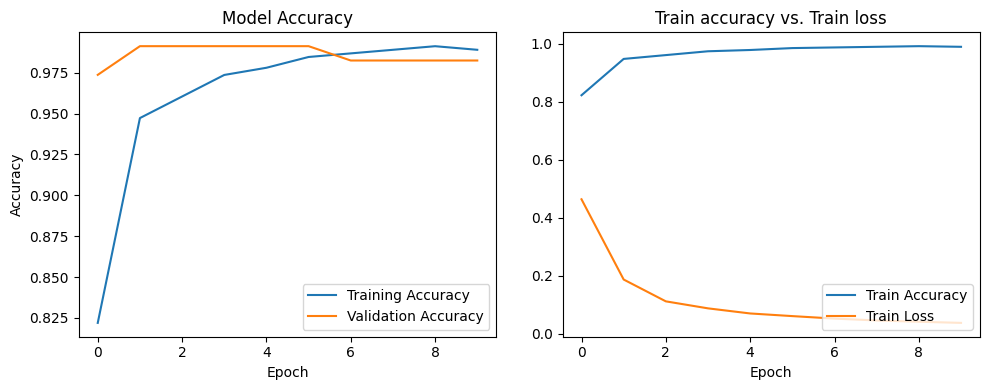

In [50]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Train accuracy vs. Train loss')
plt.xlabel('Epoch')
plt.ylabel(' ')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Model fine-tuning
This code demonstrates the fine-tuning of a neural network for binary classification. The model utilizes the tanh activation function in the input and hidden layers, with a sigmoid activation in the output layer. Early stopping and learning rate reduction callbacks are employed to prevent overfitting and optimize training efficiency. The model is trained for 8 epochs with a batch size of 16, and the validation loss and accuracy are monitored and evaluated for performance.

In [58]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
model = Sequential()

# Input
model.add(Dense(128, input_dim=30, activation='tanh'))

# Hidden
model.add(Dense(64, activation='tanh'))
model.add(Dense(16, activation='tanh'))

# Output
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)
callbacks=[early_stopping, reduce_lr]

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=8,
                    batch_size=16,
                    callbacks=callbacks)

Epoch 1/8
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8598 - loss: 0.3501 - val_accuracy: 1.0000 - val_loss: 0.0704 - learning_rate: 0.0010
Epoch 2/8
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9787 - loss: 0.1036 - val_accuracy: 0.9912 - val_loss: 0.0457 - learning_rate: 0.0010
Epoch 3/8
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9805 - loss: 0.0770 - val_accuracy: 1.0000 - val_loss: 0.0297 - learning_rate: 0.0010
Epoch 4/8
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0586 - val_accuracy: 0.9912 - val_loss: 0.0331 - learning_rate: 0.0010


# Model evaluation

In [59]:
val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

Validation Loss: 0.0297
Validation Accuracy: 1.0000


In [56]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'Train Loss: {train_loss:.4f}')
print(f'Train Accuracy: {train_accuracy:.4f}')

Train Loss: 0.0538
Train Accuracy: 0.9890


The model demonstrates strong performance, with a validation accuracy of 1.0000 and a low validation loss of 0.0297, indicating perfect classification on the test set. On the training set, the model maintains high accuracy at 98.90% with a train loss of 0.0538, suggesting effective learning without overfitting.